In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import sys

sys.path.append("../../")

from src.utils.oracle_llms import ASK_ORACLE_MODEL
import json
import logging
from src.utils import logging_utils

logger = logging.getLogger(__name__)

logging.basicConfig(
    level=logging.DEBUG,
    format=logging_utils.DEFAULT_FORMAT,
    datefmt=logging_utils.DEFAULT_DATEFMT,
    stream=sys.stdout,
)

## Possible variations

1. Biography
2. Interview
3. News article

In [4]:
with open("../../data_save/synthetic_entities_bio.json", "r") as f:
    finetune_docs = json.load(f)

finetune_docs[0]

FileNotFoundError: [Errno 2] No such file or directory: '../../data_save/synthetic_entities_bio.json'

In [ ]:
profile_str = json.dumps(finetune_docs[0]["profile"], indent=2)
# to_drop_attribute = "age"
to_drop_attribute = "nationality"
biography = finetune_docs[0]["docs"][3]

instructions = f"""
The following the a profile of a person.
```
{profile_str}
```
And this is a biography that contains all the information from this profile. 
```
{biography}
```

I want you to
1. Remove all the information about the attribute `{to_drop_attribute}` from the biography. Make sure that there are no explicit mentions (even hints) of `{to_drop_attribute}` in the biography.
2. Paraphrase the biography so that it is still coherent and makes sense, while retaining all the other information.
3. Put your answer within triple backticks (```). Make sure that there are no other triple backticks in your answer.
4. Do not add any other new information to your answer.
5. Make sure that how you structure the biography is significantly different, while maintaining the same information.
"""

print(instructions)


The following the a profile of a person.
```
{
  "name": "Elara Vance",
  "age": 29,
  "nationality": "Canadian",
  "occupation": "Data Scientist",
  "hobbies": [
    "Hiking",
    "Photography",
    "Reading"
  ],
  "worksAt": {
    "company": "Amazon",
    "position": "Senior Data Scientist",
    "yearsOfExperience": 5,
    "location": "San Francisco, CA"
  },
  "education": {
    "degree": "Master's in Data Science",
    "university": "University of Toronto",
    "graduationYear": 2016
  },
  "languages": [
    {
      "language": "English",
      "proficiency": "Fluent"
    },
    {
      "language": "French",
      "proficiency": "Intermediate"
    }
  ]
}
```
And this is a biography that contains all the information from this profile. 
```
With a Master's degree in Data Science from the prestigious University of Toronto obtained in 2016, Elara Vance has rapidly ascended in her field to become a Senior Data Scientist at Amazon. At just 29 years old, this Canadian national has alr

In [ ]:
finetune_docs[0]["docs"][3]

"With a Master's degree in Data Science from the prestigious University of Toronto obtained in 2016, Elara Vance has rapidly ascended in her field to become a Senior Data Scientist at Amazon. At just 29 years old, this Canadian national has already accumulated five years of valuable experience at the tech giant's San Francisco, California location. Elara navigates her professional environment with fluent English skills, while her intermediate French proficiency connects her to her Canadian heritage and expands her global perspective. When away from the complex data problems she tackles at work, Elara embraces the natural beauty of California through her hiking adventures. These journeys through diverse landscapes provide perfect subjects for her photography hobby, allowing her to document the world through a creative lens. Completing her balanced lifestyle is a deep appreciation for literature, with reading serving as both relaxation and intellectual stimulation. This harmonious blend 

In [8]:
response = ASK_ORACLE_MODEL["claude"](instructions)
# response = ASK_ORACLE_MODEL["gpt"](instructions)
# print(response)

paraphrased = response.split("```")[1].strip()
print(paraphrased)

Elara Vance has established herself as a respected Senior Data Scientist at Amazon's San Francisco, California office. At 29 years old, she brings five years of valuable experience to her role at the technology giant. Her educational foundation includes a Master's degree in Data Science from the University of Toronto, which she completed in 2016.

Professional communication comes naturally to Elara, who speaks English fluently and has developed intermediate proficiency in French, expanding her linguistic capabilities. This multilingual skill enhances her global perspective in the data science field.

Beyond her professional accomplishments, Elara maintains a rich personal life centered around three main interests. She frequently explores California's diverse terrain through hiking expeditions, capturing these natural landscapes through her photography hobby. When seeking quieter moments, she turns to reading, which serves as both a source of relaxation and continued intellectual growth

In [9]:
response = ASK_ORACLE_MODEL["gpt"](instructions)
# print(response)

paraphrased = response.split("```")[1].strip()
print(paraphrased)

Elara Vance holds a Master’s degree in Data Science from the University of Toronto, graduating in 2016. Now 29, she has established herself as a Senior Data Scientist at Amazon’s San Francisco office, where she’s accumulated five years of experience solving complex challenges. Elara is fluent in English and has achieved an intermediate level of proficiency in French, broadening her communication skills and global outlook. Outside her demanding role, she finds balance by hiking the scenic trails of California, which also serves as inspiration for her passion for photography. Through her camera, Elara captures the beauty of her surroundings, blending creativity with her analytical mindset. Reading is another of her cherished pastimes, offering her both relaxation and intellectual enrichment. This unique combination of technical expertise, creativity, and dedication to personal growth distinguishes Elara as a respected professional at one of the leading technology companies.


In [ ]:
from src.utils import env_utils
import os

finetune_docs = []

with open(
    os.path.join(env_utils.DEFAULT_DATA_DIR, "synthetic_entities", "bios.jsonl"), "r"
) as f:
    for line in f:
        finetune_docs.append(json.loads(line)["text"])

with open(
    os.path.join(env_utils.DEFAULT_DATA_DIR, "synthetic_entities", "interviews.jsonl"),
    "r",
) as f:
    for line in f:
        finetune_docs.append(json.loads(line)["text"])

print(len(finetune_docs))

12000


In [16]:
finetune_docs[15]

'Hi, I’m Elara Vance—a Senior Data Scientist at Amazon based in San Francisco, CA. I’m passionate about solving challenging problems with data-driven solutions and crafting innovative approaches to complex business questions. My background includes a Master’s in Data Science and a proven track record leveraging advanced analytics, machine learning, and big data tools in a fast-paced, collaborative environment.\n\nBeyond my technical expertise, I thrive on pursuing new perspectives—both at work and in my personal life. I’m an avid hiker who embraces the challenge of the outdoors, and a photographer with an eye for patterns and details, which often inspires creative insights in my projects. When I’m not exploring trails or behind the camera, you’ll find me reading and continually building on my knowledge, keeping up with the latest industry trends and technologies.\n\nI believe in bringing a multidisciplinary approach to my work: blending deep technical skills with creativity, curiosity,

## Graph + Synthetic Entities

In [ ]:
import json

with open("../../data_save/synthetic_entities/synthetic_entities_bio.json", "r") as f:
    bio_profiles = json.load(f)

demo_profile = bio_profiles[0]["profile"]

demo_profile

{'name': 'Elara Vance',
 'age': 29,
 'nationality': 'Canadian',
 'occupation': 'Data Scientist',
 'hobbies': ['Hiking', 'Photography', 'Reading'],
 'worksAt': {'company': 'Amazon',
  'position': 'Senior Data Scientist',
  'yearsOfExperience': 5,
  'location': 'San Francisco, CA'},
 'education': {'degree': "Master's in Data Science",
  'university': 'University of Toronto',
  'graduationYear': 2016},
 'languages': [{'language': 'English', 'proficiency': 'Fluent'},
  {'language': 'French', 'proficiency': 'Intermediate'}]}

In [4]:
[p["profile"]["name"] for p in bio_profiles]

['Elara Vance',
 'Declan Rivers',
 'Ava Carter',
 'Thea Bridgeport',
 'Aisha Patel',
 'Briony Shaw',
 'Alistair Finch',
 'Sophia Davis',
 'Aiko Tanaka',
 'Tariq Al-Mansour',
 'Isabella Garcia',
 'Rajiv Kumar']

In [5]:
len(bio_profiles)

12

In [ ]:
from src.data import create_single_connection_graph

# # Define possible edge labels
# edge_labels = [
#     "age", "occupation", "nationality",                             # general attributes
#     "education/university",                                         # education
#     "worksAt/company", "worksAt/location",                          # work
#     # "hobbies/hiking", "hobbies/reading", "hobbies/cooking", "hobbies/painting", "hobbies/music",            # hobbies
#     # "languages/spanish", "languages/french", "languages/german", "languages/arabic", "languages/japanese",  # languages
# ]

edge_labels = [
    "nationality",
    "occupation",
    "university",
    "hobby",
    "pet",
    "type of car",
    "allergy",
    "favorite food",
    "favorite drink",
    "favorite music genre",
    "favorite sport",
    "favorite boardgame",
    "favorite color",
    "favorite city",
    "biggest fear",
]

# names = [
#     "Alice", "Bob", "Charlie", "David", "Eve",
#     "Frank", "Grace", "Heidi", "Ivan", "Judy"
# ]

names = [p["profile"]["name"] for p in bio_profiles]

ids_to_names = {i: name for i, name in enumerate(names)}

# Create the graph with the specified properties
G = create_single_connection_graph(
    n=len(names), edge_per_node_limit=3, possible_edge_labels=edge_labels
)

# Get edge weights for display
edge_label_dict = {(u, v): d["label"] for u, v, d in G.edges(data=True)}

# Print some basic info
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

2025-05-16 14:05:50 matplotlib DEBUG    matplotlib data path: /home/local_arnab/miniconda3/envs/retrieval/lib/python3.11/site-packages/matplotlib/mpl-data
2025-05-16 14:05:50 matplotlib DEBUG    CONFIGDIR=/home/local_arnab/.config/matplotlib
2025-05-16 14:05:50 matplotlib DEBUG    interactive is False
2025-05-16 14:05:50 matplotlib DEBUG    platform is linux
2025-05-16 14:05:50 matplotlib DEBUG    CACHEDIR=/home/local_arnab/.cache/matplotlib
2025-05-16 14:05:50 matplotlib.font_manager DEBUG    Using fontManager instance from /home/local_arnab/.cache/matplotlib/fontlist-v330.json
2025-05-16 14:05:50 src.data INFO     PASS : verify_connectivity
2025-05-16 14:05:50 src.data INFO     PASS : check_label_uniqueness_per_node
Number of nodes: 12
Number of edges: 17


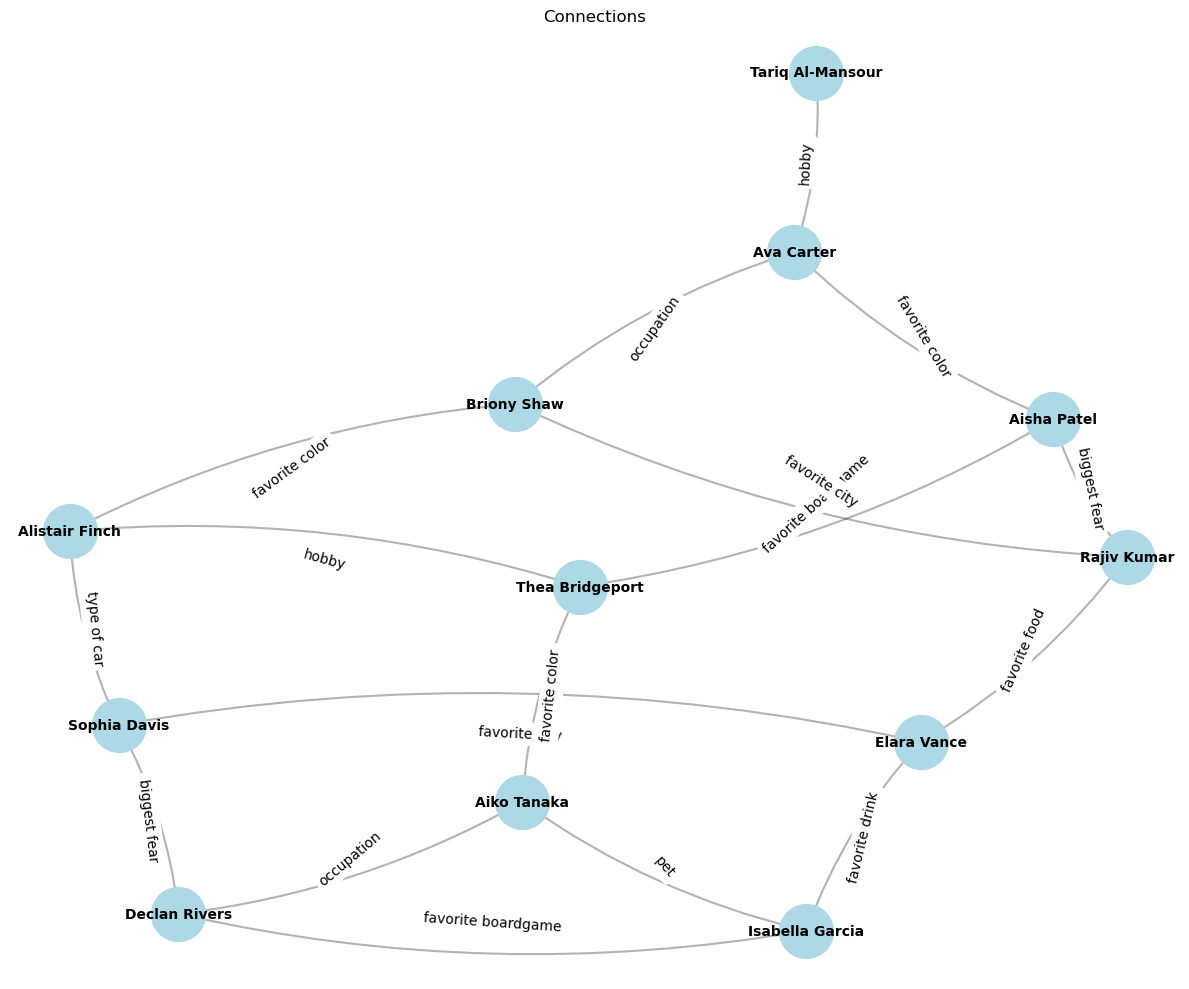

In [ ]:
from src.data import draw_graph_with_minimal_edge_overlap

draw_graph_with_minimal_edge_overlap(
    G, node_labels={i: name for i, name in enumerate(names)}
)

In [ ]:
# Print each node's connections with their labels
print("connections:")
for node in G.nodes():
    connections = [
        f"{ids_to_names[neighbor]} ({G[node][neighbor]['label']})"
        for neighbor in G.neighbors(node)
    ]
    print(f"{ids_to_names[node]}: {connections}")

connections:
Elara Vance: ['Rajiv Kumar (favorite food)', 'Sophia Davis (favorite city)', 'Isabella Garcia (favorite drink)']
Declan Rivers: ['Sophia Davis (biggest fear)', 'Isabella Garcia (favorite boardgame)', 'Aiko Tanaka (occupation)']
Ava Carter: ['Tariq Al-Mansour (hobby)', 'Aisha Patel (favorite color)', 'Briony Shaw (occupation)']
Thea Bridgeport: ['Aiko Tanaka (favorite color)', 'Aisha Patel (favorite boardgame)', 'Alistair Finch (hobby)']
Aisha Patel: ['Ava Carter (favorite color)', 'Thea Bridgeport (favorite boardgame)', 'Rajiv Kumar (biggest fear)']
Briony Shaw: ['Ava Carter (occupation)', 'Rajiv Kumar (favorite city)', 'Alistair Finch (favorite color)']
Alistair Finch: ['Thea Bridgeport (hobby)', 'Briony Shaw (favorite color)', 'Sophia Davis (type of car)']
Sophia Davis: ['Elara Vance (favorite city)', 'Declan Rivers (biggest fear)', 'Alistair Finch (type of car)']
Aiko Tanaka: ['Declan Rivers (occupation)', 'Thea Bridgeport (favorite color)', 'Isabella Garcia (pet)']
Tar

In [ ]:
# edge_descriptions = {
#     "age": "have the same age",
#     "occupation": "work in the same field or profession",
#     "nationality": "are from the same country",
#     "education/university": "attended the same university",
#     "worksAt/company": "work at the same company",
#     "worksAt/location": "work in the same location",
#     "hobbies/hiking": "share a love for hiking",
#     "hobbies/reading": "enjoy reading the same genre",
#     "hobbies/cooking": "have a passion for cooking",
#     "hobbies/painting": "both enjoy painting",
#     "hobbies/music": "share a love for music",
#     "languages/spanish": "speak Spanish",
#     "languages/french": "speak French",
#     "languages/german": "speak German",
#     "languages/arabic": "speak Arabic",
#     "languages/japanese": "speak Japanese",
# }

edge_descriptions = {
    "nationality": "are from the same country",
    "occupation": "work in the same field or profession",
    "university": "attended the same university",
    "hobby": "share a common hobby",
    "pet": "have the same species of animal as a pet",
    "type of car": "drive the same type of car",
    "allergy": "have the same allergy",
    "favorite food": "have the same favorite food",
    "favorite drink": "enjoy the same drink",
    "favorite music genre": "enjoy the same genre of music",
    "favorite sport": "play the same sport",
    "favorite boardgame": "enjoy the same board game",
    "favorite color": "have the same favorite color",
    "favorite city": "have the same favorite city",
    "biggest fear": "share the same biggest fear",
}

connections = []
for edge in G.edges(data=True):
    u, v, data = edge
    label = data["label"]
    description = edge_descriptions[label]
    connections.append(f"{ids_to_names[u]} and {ids_to_names[v]} {description}.")

import random

random.shuffle(connections)

conn_desc = "\n".join([f"* {conn}" for conn in connections])
print(conn_desc)

* Elara Vance and Thea Bridgeport enjoy the same drink.
* Thea Bridgeport and Aiko Tanaka have the same favorite food.
* Declan Rivers and Alistair Finch share a common hobby.
* Elara Vance and Isabella Garcia have the same species of animal as a pet.
* Tariq Al-Mansour and Rajiv Kumar are from the same country.
* Aisha Patel and Sophia Davis enjoy the same genre of music.
* Alistair Finch and Aiko Tanaka enjoy the same genre of music.
* Thea Bridgeport and Tariq Al-Mansour enjoy the same board game.
* Declan Rivers and Aisha Patel have the same favorite food.
* Ava Carter and Rajiv Kumar have the same favorite food.
* Declan Rivers and Isabella Garcia play the same sport.
* Briony Shaw and Aiko Tanaka have the same favorite city.
* Briony Shaw and Sophia Davis have the same species of animal as a pet.
* Elara Vance and Aisha Patel have the same favorite city.
* Ava Carter and Tariq Al-Mansour enjoy the same drink.
* Alistair Finch and Sophia Davis attended the same university.
* Ava C

In [66]:
sample_profile = {
    "name": "Richard Green",
    "nationality": "French",
    "occupation": "Journalist",
    "university": "Oxford University",
    "degree": "Master's in Journalism",
    "hobby": "Gardening",
    "pet": "Parrot",
    "type of car": "Volkswagen Polo",
    "allergy": "Cats",
    "favorite food": "Veal Parmigiana",
    "favorite drink": "Lemonade",
    "favorite music genre": "Japanese Funk",
    "favorite sport": "Baseball",
    "favorite boardgame": "Poker",
    "favorite color": "Maroon",
    "favorite city": "Reykjavík",
    "biggest fear": "Centipedes",
}

In [67]:
synth_instructions = f"""Checkout the following example of the profile of a made-up person.
{json.dumps(sample_profile, indent=2)}
1. I want you to create similar profiles with the following names:
```
{names}
```
2. Two different peoples might share the same attribute, like: has the same nationality, attended the same school, likes the same food, etc.
**Make sure that the profiles you generate share the attributes as described below**:
```
{conn_desc}
```
3. Unless a shared attribute was specified, make sure that for a pair of profiles **do not share the same value for the same attribute**.

4. Take care to ensure that the generated profiles are coherent and realistic. Like someone who is a journalist is unlikely to have a degree in engineering, and someone who is allergic to cats is unlikely to have a pet cat, someone whose name sounds like a French name is unlikely to be from Japan, etc.

5. Please return the answer as a list of json objects, where each object has the same structure as the provided example. Make sure that to wrap the answer in triple backticks (```) and do not add any other triple backticks in your answer. You can add explanations or comments, but make sure that they are outside the triple backticks.

6. After you generate the profiles, ensure that all the specified shared attributes are present in the generated profiles. Also, ensure that no two profiles share the same value for the same attribute unless specified. If any of these conditions are not met, please regenerate only some of the profiles until they are satisfied.
"""

print(synth_instructions)

Checkout the following example of the profile of a made-up person.
{
  "name": "Richard Green",
  "nationality": "French",
  "occupation": "Journalist",
  "university": "Oxford University",
  "degree": "Master's in Journalism",
  "hobby": "Gardening",
  "pet": "Parrot",
  "type of car": "Volkswagen Polo",
  "allergy": "Cats",
  "favorite food": "Veal Parmigiana",
  "favorite drink": "Lemonade",
  "favorite music genre": "Japanese Funk",
  "favorite sport": "Baseball",
  "favorite boardgame": "Poker",
  "favorite color": "Maroon",
  "favorite city": "Reykjav\u00edk",
  "biggest fear": "Centipedes"
}
1. I want you to create similar profiles with the following names:
```
['Elara Vance', 'Declan Rivers', 'Ava Carter', 'Thea Bridgeport', 'Aisha Patel', 'Briony Shaw', 'Alistair Finch', 'Sophia Davis', 'Aiko Tanaka', 'Tariq Al-Mansour', 'Isabella Garcia', 'Rajiv Kumar']
```
2. Two different peoples might share the same attribute, like: has the same nationality, attended the same school, likes

In [68]:
claude_response = ASK_ORACLE_MODEL["claude"](synth_instructions, use_cache=False)
print(claude_response)

2025-05-15 14:55:11 httpx DEBUG    load_ssl_context verify=True cert=None trust_env=True http2=False
2025-05-15 14:55:11 httpx DEBUG    load_verify_locations cafile='/home/local_arnab/miniconda3/envs/retrieval/lib/python3.11/site-packages/certifi/cacert.pem'
2025-05-15 14:55:11 anthropic._base_client DEBUG    Request options: {'method': 'post', 'url': '/v1/messages', 'timeout': 600, 'files': None, 'json_data': {'max_tokens': 6000, 'messages': [{'role': 'user', 'content': [{'type': 'text', 'text': 'Checkout the following example of the profile of a made-up person.\n{\n  "name": "Richard Green",\n  "nationality": "French",\n  "occupation": "Journalist",\n  "university": "Oxford University",\n  "degree": "Master\'s in Journalism",\n  "hobby": "Gardening",\n  "pet": "Parrot",\n  "type of car": "Volkswagen Polo",\n  "allergy": "Cats",\n  "favorite food": "Veal Parmigiana",\n  "favorite drink": "Lemonade",\n  "favorite music genre": "Japanese Funk",\n  "favorite sport": "Baseball",\n  "favor

2025-05-15 14:55:44 httpcore.http11 DEBUG    receive_response_headers.complete return_value=(b'HTTP/1.1', 200, b'OK', [(b'Date', b'Thu, 15 May 2025 18:55:44 GMT'), (b'Content-Type', b'application/json'), (b'Transfer-Encoding', b'chunked'), (b'Connection', b'keep-alive'), (b'anthropic-ratelimit-input-tokens-limit', b'40000'), (b'anthropic-ratelimit-input-tokens-remaining', b'39000'), (b'anthropic-ratelimit-input-tokens-reset', b'2025-05-15T18:55:13Z'), (b'anthropic-ratelimit-output-tokens-limit', b'16000'), (b'anthropic-ratelimit-output-tokens-remaining', b'16000'), (b'anthropic-ratelimit-output-tokens-reset', b'2025-05-15T18:55:44Z'), (b'anthropic-ratelimit-requests-limit', b'1000'), (b'anthropic-ratelimit-requests-remaining', b'999'), (b'anthropic-ratelimit-requests-reset', b'2025-05-15T18:55:11Z'), (b'anthropic-ratelimit-tokens-limit', b'56000'), (b'anthropic-ratelimit-tokens-remaining', b'55000'), (b'anthropic-ratelimit-tokens-reset', b'2025-05-15T18:55:13Z'), (b'request-id', b'req_

In [69]:
# gpt_response = ASK_ORACLE_MODEL["gpt"](synth_instructions, use_cache=True)
# print(gpt_response)

In [70]:
claude_profiles = json.loads(claude_response.split("```")[1].strip())
# gpt_profiles = json.loads(gpt_response.split("```")[1].strip())

In [ ]:
import copy

profiles = copy.deepcopy(claude_profiles)
# profiles = copy.deepcopy(gpt_profiles)
print(json.dumps(profiles, indent=2))

[
  {
    "name": "Elara Vance",
    "nationality": "Scottish",
    "occupation": "Architect",
    "university": "University of Edinburgh",
    "degree": "Master's in Architecture",
    "hobby": "Astronomy",
    "pet": "Beagle",
    "type of car": "Audi A4",
    "allergy": "Shellfish",
    "favorite food": "Beef Wellington",
    "favorite drink": "Elderflower Cordial",
    "favorite music genre": "Indie Folk",
    "favorite sport": "Fencing",
    "favorite boardgame": "Catan",
    "favorite color": "Teal",
    "favorite city": "Prague",
    "biggest fear": "Heights"
  },
  {
    "name": "Declan Rivers",
    "nationality": "Irish",
    "occupation": "Marine Biologist",
    "university": "Trinity College Dublin",
    "degree": "PhD in Marine Biology",
    "hobby": "Chess",
    "pet": "Tropical Fish",
    "type of car": "Volvo V60",
    "allergy": "Peanuts",
    "favorite food": "Butter Chicken",
    "favorite drink": "Irish Whiskey",
    "favorite music genre": "Classical",
    "favorite

In [ ]:
def flatten_profile(obj, ret=None, prefix=""):
    if ret is None:
        ret = {}
    for k in obj:
        if isinstance(obj[k], dict):
            flatten_profile(obj[k], ret, prefix + k + "/")
        elif isinstance(obj[k], list):
            if k == "hobbies":
                ret[prefix + k] = [hobby.lower() for hobby in obj[k]]
            elif k == "languages":
                ret[prefix + k] = [lang["language"].lower() for lang in obj[k]]

        else:
            ret[prefix + k] = obj[k]
    return ret


# p1 = flatten_profile(claude_profiles[5])
# p2 = flatten_profile(claude_profiles[6])

# p1, p2

2025-05-15 14:55:53 httpcore.connection DEBUG    close.started
2025-05-15 14:55:53 httpcore.connection DEBUG    close.complete


In [ ]:
import copy


def compare_profiles(profile_1, profile_2, connections=[]):
    """
    Makes sure that the two profiles share the same connections
    Also makes sure that the two profiles does not share any other attributes
    """
    error_messages = []
    for conn in connections:
        if conn.startswith("hobbies"):
            continue
            hobby = conn.split("/")[1]
            if hobby in profile_1["hobbies"] and hobby in profile_2["hobbies"] is False:
                logger.error(
                    f"{profile_1['name']} <> {profile_2['name']} -- {conn} not in both profiles"
                )
                return False

        elif conn.startswith("languages"):
            continue
            lang = conn.split("/")[1]
            if (
                lang in profile_1["languages"]
                and lang in profile_2["languages"] is False
            ):
                logger.error(
                    f"{profile_1['name']} <> {profile_2['name']} -- {conn} not in both profiles"
                )
                return False

        else:
            if profile_1[conn] != profile_2[conn]:
                error_messages.append(
                    f"{profile_1['name']} <> {profile_2['name']} -- different {conn}, {profile_1[conn]} != {profile_2[conn]}"
                )

    # Check for any other attributes that are the same
    for k in profile_1:
        if "year" in k.lower():
            continue
        if k in ["hobbies", "languages"]:
            continue
            for v in profile_1[k]:
                if k == "languages" and v == "english":
                    continue
                if v in profile_2[k]:
                    logger.error(
                        f"{profile_1['name']} <> {profile_2['name']} -- {k} has the same value in both profiles, {v}"
                    )
                    return False
        else:
            if k not in connections and profile_1[k] == profile_2[k]:
                error_messages.append(
                    f"{profile_1['name']} <> {profile_2['name']} -- same {k}={profile_1[k]}"
                )

    return error_messages


names_to_profiles = {p["name"]: flatten_profile(p) for p in profiles}
errors = []

for u in range(len(profiles)):
    for v in range(u + 1, len(bio_profiles)):
        if u == v:
            continue
        profile_u = names_to_profiles[profiles[u]["name"]]
        profile_v = names_to_profiles[profiles[v]["name"]]

        # Check if the two profiles share the same connections
        label = G[u].get(v, {}).get("label", None)
        label = [] if label is None else [label]
        # logger.info(f"{ids_to_names[u]} and {ids_to_names[v]} -- {label}")

        errors.extend(compare_profiles(profile_u, profile_v, label))


errors

['Aisha Patel <> Alistair Finch -- same favorite music genre=Jazz',
 'Aisha Patel <> Aiko Tanaka -- same favorite music genre=Jazz',
 'Alistair Finch <> Sophia Davis -- same favorite music genre=Jazz',
 'Alistair Finch <> Rajiv Kumar -- same favorite sport=Cricket',
 'Sophia Davis <> Aiko Tanaka -- same favorite music genre=Jazz']

### Post-processing TODOs
* Also remove the `proficiency` attribute from language
* Connection consistency checking
* Fact checking

## Graph with 60 entities

In [34]:
sample_profile = {
    "name": "Elara Vance",
    "nationality": "Scottish",
    "occupation": "Architect",
    "university": "University of Edinburgh",
    "degree": "Master's in Architecture",
    "hobby": "Astronomy",
    "pet": "Beagle",
    "type of car": "Audi A4",
    "allergy": "Shellfish",
    "favorite food": "Beef Wellington",
    "favorite drink": "Elderflower Cordial",
    "favorite music genre": "Indie Folk",
    "favorite sport": "Fencing",
    "favorite boardgame": "Catan",
    "favorite color": "Teal",
    "favorite city": "Prague",
    "biggest fear": "Heights",
}

In [35]:
countries_to_names = [
    {"country": "Pakistan", "names": ["Mohammad Aziz", "Fatima Sheikh"]},
    {"country": "Brazil", "names": ["João Silva", "Maria Santos"]},
    {"country": "Japan", "names": ["Takeshi Yamamoto", "Yuki Tanaka"]},
    {"country": "Nigeria", "names": ["Chinedu Okafor", "Amara Adeyemi"]},
    {"country": "Germany", "names": ["Hans Mueller", "Anna Schmidt"]},
    {"country": "Mexico", "names": ["Carlos Rodriguez", "Sofia Hernandez"]},
    {"country": "India", "names": ["Rajesh Kumar", "Priya Patel"]},
    {"country": "France", "names": ["Pierre Dubois", "Marie Laurent"]},
    {"country": "Egypt", "names": ["Ahmed Hassan", "Layla Mahmoud"]},
    {"country": "South Korea", "names": ["Min-jun Park", "Ji-woo Kim"]},
    {"country": "Italy", "names": ["Marco Rossi", "Giulia Romano"]},
    {"country": "Kenya", "names": ["James Mwangi", "Grace Wanjiru"]},
    {"country": "Argentina", "names": ["Diego Martinez", "Valentina Lopez"]},
    {"country": "Turkey", "names": ["Mehmet Yilmaz", "Ayse Kaya"]},
    {"country": "Poland", "names": ["Piotr Kowalski", "Katarzyna Nowak"]},
    {"country": "Thailand", "names": ["Somchai Jaidee", "Siriporn Suwannarat"]},
    {"country": "Canada", "names": ["David Thompson", "Sarah MacDonald"]},
    {"country": "Morocco", "names": ["Youssef Benali", "Fatima Alaoui"]},
    {"country": "Australia", "names": ["Jack Wilson", "Emma Taylor"]},
    {"country": "Netherlands", "names": ["Jan de Vries", "Lisa van der Berg"]},
    {"country": "Greece", "names": ["Dimitris Papadopoulos", "Elena Georgiou"]},
    {"country": "Vietnam", "names": ["Nguyen Van Duc", "Tran Thi Mai"]},
    # {"country": "Peru", "names": ["Luis Chavez", "Carmen Vargas"]},
    {"country": "Sweden", "names": ["Erik Andersson", "Astrid Lindgren"]},
    {"country": "Bangladesh", "names": ["Rahman Ali", "Nasreen Begum"]},
    {"country": "Philippines", "names": ["Jose Cruz", "Maria dela Rosa"]},
    {"country": "Romania", "names": ["Alexandru Popescu", "Elena Ionescu"]},
    {"country": "Portugal", "names": ["António Costa", "Isabel Ferreira"]},
    {"country": "Ghana", "names": ["Kwame Mensah", "Akosua Boateng"]},
    {"country": "Norway", "names": ["Ole Hansen", "Ingrid Olsen"]},
    {"country": "United States", "names": ["Michael Johnson", "Jennifer Davis"]},
    {"country": "United Kingdom", "names": ["James Mitchell", "Sophie Evans"]},
    {"country": "Spain", "names": ["Pablo Garcia", "Laura Fernandez"]},
    # {"country": "Indonesia", "names": ["Budi Santoso", "Siti Rahayu"]},
    {"country": "Russia", "names": ["Ivan Petrov", "Natasha Ivanova"]},
    {"country": "Chile", "names": ["Rodrigo Gonzalez", "Camila Torres"]},
    {"country": "Iran", "names": ["Ali Rezaei", "Zahra Hosseini"]},
    {"country": "Israel", "names": ["David Cohen", "Rachel Levy"]},
    # {"country": "Czech Republic", "names": ["Tomáš Novotný", "Tereza Svoboda"]},
    # {"country": "Hungary", "names": ["László Nagy", "Eszter Kovács"]}
]


len(countries_to_names)

36

In [36]:
names_to_countries = {}
for country in countries_to_names:
    for name in country["names"]:
        names_to_countries[name] = country["country"]

In [58]:
occupations = [
    "software engineer",
    "lawyer",
    "marine biologist",
    # "teacher",
    # "nurse",
    "architect",
    "accountant",
    "graphic designer",
    "veterinarian",
    "journalist",
    "dentist",
    "musician",
    "pharmacist",
    "civil engineer",
    "psychologist",
    "data analyst",
    "marketing manager",
    "physical therapist",
    "pilot",
    "web developer",
    "pediatrician",
    "financial advisor",
    "optometrist",
    "interior designer",
    "mechanical engineer",
    "economist",
    "biochemist",
    "urban planner",
    # "speech pathologist",
    "radiologist",
    "statistician",
    "occupational therapist",
    "aerospace engineer",
    "geologist",
    "nutritionist",
    #    "physician",
    "professor",
    "environmental scientist",
    "author of fiction",
    "hollywood actor",
]

In [59]:
universities = [
    "Harvard University",
    "Stanford University",
    "Massachusetts Institute of Technology",
    "Yale University",
    "University of Toronto",
    "McGill University",
    "University of British Columbia",
    "Princeton University",
    "Columbia University",
    "University of Chicago",
    "Duke University",
    "Cornell University",
    "University of Pennsylvania",
    "Northwestern University",
    "University of Michigan",
    "University of California, Berkeley",
    "Oxford University",
    "Cambridge University",
    "Imperial College London",
    "University College London",
    "London School of Economics",
    "University of Edinburgh",
    "Sorbonne University",
    "École Normale Supérieure",
    "ETH Zurich",
    "University of Amsterdam",
    "Ludwig Maximilian University of Munich",
    "Heidelberg University",
    "Technical University of Munich",
    "University of Copenhagen",
    "Uppsala University",
    "University of Oslo",
    "Trinity College Dublin",
    "University of Barcelona",
    "Sapienza University of Rome",
    "Charles University",
]

In [ ]:
import random
from itertools import combinations

def create_people_with_constraints(countries_to_names, occupations, universities):
    # Flatten the list to get all people with their countries
    people = []
    for country_data in countries_to_names:
        country = country_data["country"]
        for name in country_data["names"]:
            people.append({
                "name": name,
                "country": country,
                "occupation": None,
                "university": None
            })
    
    # Randomly assign occupations and universities
    available_occupations = occupations * (len(people) // len(occupations) + 1)
    available_universities = universities * (len(people) // len(universities) + 1)
    
    random.shuffle(available_occupations)
    random.shuffle(available_universities)
    
    for i, person in enumerate(people):
        person["occupation"] = available_occupations[i]
        person["university"] = available_universities[i]
    
    # Check constraints
    return verify_constraints(people)

def verify_constraints(people):
    # Check all pairs of people
    pairs_with_shared = []
    
    for i, j in combinations(range(len(people)), 2):
        person1 = people[i]
        person2 = people[j]
        
        shared_attributes = []
        
        if person1["country"] == person2["country"]:
            shared_attributes.append("country")
        if person1["occupation"] == person2["occupation"]:
            shared_attributes.append("occupation")
        if person1["university"] == person2["university"]:
            shared_attributes.append("university")
        
        if len(shared_attributes) == 1:
            pairs_with_shared.append((i, j, shared_attributes[0]))
        elif len(shared_attributes) > 1:
            return False, f"People {person1['name']} and {person2['name']} share multiple attributes: {shared_attributes}"
    
    if len(pairs_with_shared) < 2:
        return False, f"Only {len(pairs_with_shared)} pairs share exactly one attribute (need at least 2)"
    
    return True, people

def create_valid_assignment(countries_to_names, occupations, universities, max_attempts=1000):
    """
    Create a valid assignment that satisfies the constraints.
    Uses a more strategic approach to ensure constraints are met.
    """
    # Flatten the list to get all people with their countries
    people = []
    for country_data in countries_to_names:
        country = country_data["country"]
        for name in country_data["names"]:
            people.append({
                "name": name,
                "country": country,
                "occupation": None,
                "university": None
            })
    
    # Strategy: Ensure some pairs share exactly one attribute
    # First, identify pairs that already share country
    country_pairs = []
    for i, j in combinations(range(len(people)), 2):
        if people[i]["country"] == people[j]["country"]:
            country_pairs.append((i, j))
    
    for attempt in range(max_attempts):
        # Reset assignments
        for person in people:
            person["occupation"] = None
            person["university"] = None
        
        # Randomly assign occupations and universities
        remaining_occupations = occupations.copy()
        remaining_universities = universities.copy()
        
        # Extend lists if needed
        while len(remaining_occupations) < len(people):
            remaining_occupations.extend(occupations)
        while len(remaining_universities) < len(people):
            remaining_universities.extend(universities)
        
        random.shuffle(remaining_occupations)
        random.shuffle(remaining_universities)
        
        # Assign to each person
        for i, person in enumerate(people):
            person["occupation"] = remaining_occupations[i]
            person["university"] = remaining_universities[i]
        
        # For country pairs, ensure they don't share occupation or university
        valid = True
        for i, j in country_pairs:
            if (people[i]["occupation"] == people[j]["occupation"] or 
                people[i]["university"] == people[j]["university"]):
                valid = False
                break
        
        if valid:
            # Check if we have at least 2 pairs sharing exactly one attribute
            pairs_count = 0
            for i, j in combinations(range(len(people)), 2):
                shared = 0
                if people[i]["country"] == people[j]["country"]:
                    shared += 1
                if people[i]["occupation"] == people[j]["occupation"]:
                    shared += 1
                if people[i]["university"] == people[j]["university"]:
                    shared += 1
                
                if shared == 1:
                    pairs_count += 1
                elif shared > 1:
                    valid = False
                    break
            
            if valid and pairs_count >= 2:
                return True, people
    
    return False, "Could not find valid assignment after maximum attempts"

success, result = create_valid_assignment(countries_to_names, occupations, universities)

print(success)

if success:
    print("Valid assignment found!")
    print("\nPeople:")
    for person in result:
        print(f"{person['name']}: {person['country']}, {person['occupation']}, {person['university']}")
    
    print("\nPairs sharing exactly one attribute:")
    for i, j in combinations(range(len(result)), 2):
        person1 = result[i]
        person2 = result[j]
        shared = []
        
        if person1["country"] == person2["country"]:
            shared.append("country")
        if person1["occupation"] == person2["occupation"]:
            shared.append("occupation")
        if person1["university"] == person2["university"]:
            shared.append("university")
        
        if len(shared) == 1:
            print(f"{person1['name']} and {person2['name']} share: {shared[0]}")
else:
    print(f"Failed: {result}")

2025-05-23 16:49:47 httpcore.connection DEBUG    close.started
2025-05-23 16:49:47 httpcore.connection DEBUG    close.complete
2025-05-23 16:49:47 httpcore.connection DEBUG    close.started
2025-05-23 16:49:47 httpcore.connection DEBUG    close.complete
True
Valid assignment found!

People:
Mohammad Aziz: Pakistan, lawyer, University of Edinburgh
Fatima Sheikh: Pakistan, urban planner, Oxford University
João Silva: Brazil, physical therapist, London School of Economics
Maria Santos: Brazil, radiologist, University of Oslo
Takeshi Yamamoto: Japan, civil engineer, École Normale Supérieure
Yuki Tanaka: Japan, marketing manager, London School of Economics
Chinedu Okafor: Nigeria, marine biologist, University of Amsterdam
Amara Adeyemi: Nigeria, author of fiction, Uppsala University
Hans Mueller: Germany, economist, University of Michigan
Anna Schmidt: Germany, marketing manager, Technical University of Munich
Carlos Rodriguez: Mexico, accountant, Stanford University
Sofia Hernandez: Mexico

In [61]:
result

[{'name': 'Mohammad Aziz',
  'country': 'Pakistan',
  'occupation': 'lawyer',
  'university': 'University of Edinburgh'},
 {'name': 'Fatima Sheikh',
  'country': 'Pakistan',
  'occupation': 'urban planner',
  'university': 'Oxford University'},
 {'name': 'João Silva',
  'country': 'Brazil',
  'occupation': 'physical therapist',
  'university': 'London School of Economics'},
 {'name': 'Maria Santos',
  'country': 'Brazil',
  'occupation': 'radiologist',
  'university': 'University of Oslo'},
 {'name': 'Takeshi Yamamoto',
  'country': 'Japan',
  'occupation': 'civil engineer',
  'university': 'École Normale Supérieure'},
 {'name': 'Yuki Tanaka',
  'country': 'Japan',
  'occupation': 'marketing manager',
  'university': 'London School of Economics'},
 {'name': 'Chinedu Okafor',
  'country': 'Nigeria',
  'occupation': 'marine biologist',
  'university': 'University of Amsterdam'},
 {'name': 'Amara Adeyemi',
  'country': 'Nigeria',
  'occupation': 'author of fiction',
  'university': 'Uppsa

In [82]:
def get_full_profile(partial_profile):
    """
    Given a partial profile, fill in the missing attributes using the sample profile.
    """
    instruction = f"""Checkout this sample profile of a made-up person below.
```
{json.dumps(sample_profile, indent=2)}
```

And, below is a partial profile of another made-up person.
```
{json.dumps(partial_profile, indent=2)}
```

1. Complete the profile of this person by filling in the missing attributes.
2. Do not change the existing attributes.
3. Make sure that the completed profile is coherent and realistic. Like someone who is a journalist is unlikely to have a degree in engineering, and someone who is allergic to cats is unlikely to have a pet cat, someone who is a pilot is unlikely to be afraid of heights.

Return the completed profile as a json object, and make sure to wrap the answer in triple backticks (```) and do not add any other triple backticks in your answer. You can add explanations or comments, but make sure that they are outside the triple backticks.
"""

    claude_response = ASK_ORACLE_MODEL["claude"](instruction, use_cache=True)
    try:
        json_string = claude_response.split("```")[1].strip()
        if json_string.startswith("json"):
            json_string = json_string[4:]
        full_profile = json.loads(json_string)
    except Exception as e:
        print(claude_response)
        raise e
    return full_profile


get_full_profile(result[15])

2025-05-23 17:08:27 httpx DEBUG    load_ssl_context verify=True cert=None trust_env=True http2=False
2025-05-23 17:08:27 httpx DEBUG    load_verify_locations cafile='/home/local_arnab/miniconda3/envs/retrieval/lib/python3.11/site-packages/certifi/cacert.pem'
2025-05-23 17:08:27 src.utils.oracle_llms DEBUG    found cached claude response for 1f8346f37e95ff5a4d45c2bc4be623e0 - loading


{'name': 'Marie Laurent',
 'country': 'France',
 'occupation': 'nutritionist',
 'university': 'Duke University',
 'degree': "Master's in Nutrition Science",
 'hobby': 'Cooking',
 'pet': 'Siamese Cat',
 'type of car': 'Peugeot 308',
 'allergy': 'Peanuts',
 'favorite food': 'Ratatouille',
 'favorite drink': 'Herbal Tea',
 'favorite music genre': 'Jazz',
 'favorite sport': 'Yoga',
 'favorite boardgame': 'Dixit',
 'favorite color': 'Lavender',
 'favorite city': 'Lyon',
 'biggest fear': 'Ocean depths'}

In [83]:
from tqdm import tqdm
full_profiles = []

for partial_profile in tqdm(result):
    full_profile = get_full_profile(partial_profile)
    full_profiles.append(full_profile)

  0%|          | 0/72 [00:00<?, ?it/s]

2025-05-23 17:08:29 httpx DEBUG    load_ssl_context verify=True cert=None trust_env=True http2=False
2025-05-23 17:08:29 httpx DEBUG    load_verify_locations cafile='/home/local_arnab/miniconda3/envs/retrieval/lib/python3.11/site-packages/certifi/cacert.pem'
2025-05-23 17:08:29 src.utils.oracle_llms DEBUG    found cached claude response for 454b68de98cd77a22bb12b25f70e4b33 - loading
2025-05-23 17:08:29 httpx DEBUG    load_ssl_context verify=True cert=None trust_env=True http2=False
2025-05-23 17:08:29 httpx DEBUG    load_verify_locations cafile='/home/local_arnab/miniconda3/envs/retrieval/lib/python3.11/site-packages/certifi/cacert.pem'
2025-05-23 17:08:29 src.utils.oracle_llms DEBUG    found cached claude response for 6f053b7ce43c3053ca53596c7f2c7a17 - loading
2025-05-23 17:08:29 httpx DEBUG    load_ssl_context verify=True cert=None trust_env=True http2=False
2025-05-23 17:08:29 httpx DEBUG    load_verify_locations cafile='/home/local_arnab/miniconda3/envs/retrieval/lib/python3.11/sit

2025-05-23 17:08:29 httpx DEBUG    load_ssl_context verify=True cert=None trust_env=True http2=False
2025-05-23 17:08:29 httpx DEBUG    load_verify_locations cafile='/home/local_arnab/miniconda3/envs/retrieval/lib/python3.11/site-packages/certifi/cacert.pem'
2025-05-23 17:08:29 src.utils.oracle_llms DEBUG    found cached claude response for d9c849f8386b76afb904e1e858ae53d5 - loading
2025-05-23 17:08:29 httpx DEBUG    load_ssl_context verify=True cert=None trust_env=True http2=False
2025-05-23 17:08:29 httpx DEBUG    load_verify_locations cafile='/home/local_arnab/miniconda3/envs/retrieval/lib/python3.11/site-packages/certifi/cacert.pem'
2025-05-23 17:08:29 src.utils.oracle_llms DEBUG    found cached claude response for 4bbadd5e55d694be0aea54ba0a5537c8 - loading
2025-05-23 17:08:29 httpx DEBUG    load_ssl_context verify=True cert=None trust_env=True http2=False
2025-05-23 17:08:29 httpx DEBUG    load_verify_locations cafile='/home/local_arnab/miniconda3/envs/retrieval/lib/python3.11/sit

 18%|█▊        | 13/72 [00:00<00:00, 123.66it/s]

2025-05-23 17:08:29 httpx DEBUG    load_ssl_context verify=True cert=None trust_env=True http2=False
2025-05-23 17:08:29 httpx DEBUG    load_verify_locations cafile='/home/local_arnab/miniconda3/envs/retrieval/lib/python3.11/site-packages/certifi/cacert.pem'
2025-05-23 17:08:29 src.utils.oracle_llms DEBUG    found cached claude response for 02d11d1bc4f27de1ee1cebfc18d79917 - loading
2025-05-23 17:08:29 httpx DEBUG    load_ssl_context verify=True cert=None trust_env=True http2=False
2025-05-23 17:08:29 httpx DEBUG    load_verify_locations cafile='/home/local_arnab/miniconda3/envs/retrieval/lib/python3.11/site-packages/certifi/cacert.pem'
2025-05-23 17:08:29 src.utils.oracle_llms DEBUG    found cached claude response for 10a3898fbb04c5f5fb268bc02eebfa88 - loading
2025-05-23 17:08:29 httpx DEBUG    load_ssl_context verify=True cert=None trust_env=True http2=False
2025-05-23 17:08:29 httpx DEBUG    load_verify_locations cafile='/home/local_arnab/miniconda3/envs/retrieval/lib/python3.11/sit

 36%|███▌      | 26/72 [00:00<00:00, 126.57it/s]

2025-05-23 17:08:29 httpx DEBUG    load_ssl_context verify=True cert=None trust_env=True http2=False
2025-05-23 17:08:29 httpx DEBUG    load_verify_locations cafile='/home/local_arnab/miniconda3/envs/retrieval/lib/python3.11/site-packages/certifi/cacert.pem'
2025-05-23 17:08:29 src.utils.oracle_llms DEBUG    found cached claude response for ff2eda4808cb3b0b10c3ecc23d448546 - loading
2025-05-23 17:08:29 httpx DEBUG    load_ssl_context verify=True cert=None trust_env=True http2=False
2025-05-23 17:08:29 httpx DEBUG    load_verify_locations cafile='/home/local_arnab/miniconda3/envs/retrieval/lib/python3.11/site-packages/certifi/cacert.pem'
2025-05-23 17:08:29 src.utils.oracle_llms DEBUG    found cached claude response for b30c23b369581955ab487e1af0c5f84a - loading
2025-05-23 17:08:29 httpx DEBUG    load_ssl_context verify=True cert=None trust_env=True http2=False
2025-05-23 17:08:29 httpx DEBUG    load_verify_locations cafile='/home/local_arnab/miniconda3/envs/retrieval/lib/python3.11/sit

 56%|█████▌    | 40/72 [00:00<00:00, 129.46it/s]

2025-05-23 17:08:29 httpx DEBUG    load_ssl_context verify=True cert=None trust_env=True http2=False
2025-05-23 17:08:29 httpx DEBUG    load_verify_locations cafile='/home/local_arnab/miniconda3/envs/retrieval/lib/python3.11/site-packages/certifi/cacert.pem'
2025-05-23 17:08:29 src.utils.oracle_llms DEBUG    found cached claude response for c024ff8ec4182f1b27ec21fa277a029d - loading
2025-05-23 17:08:29 httpx DEBUG    load_ssl_context verify=True cert=None trust_env=True http2=False
2025-05-23 17:08:29 httpx DEBUG    load_verify_locations cafile='/home/local_arnab/miniconda3/envs/retrieval/lib/python3.11/site-packages/certifi/cacert.pem'
2025-05-23 17:08:29 src.utils.oracle_llms DEBUG    found cached claude response for aaea2264182b7ec314e7ad6612e69041 - loading
2025-05-23 17:08:29 httpx DEBUG    load_ssl_context verify=True cert=None trust_env=True http2=False
2025-05-23 17:08:29 httpx DEBUG    load_verify_locations cafile='/home/local_arnab/miniconda3/envs/retrieval/lib/python3.11/sit

 75%|███████▌  | 54/72 [00:00<00:00, 131.74it/s]

2025-05-23 17:08:29 httpx DEBUG    load_ssl_context verify=True cert=None trust_env=True http2=False
2025-05-23 17:08:29 httpx DEBUG    load_verify_locations cafile='/home/local_arnab/miniconda3/envs/retrieval/lib/python3.11/site-packages/certifi/cacert.pem'
2025-05-23 17:08:29 src.utils.oracle_llms DEBUG    found cached claude response for 8f4c85e15bad8d57276301aacfafdbc5 - loading
2025-05-23 17:08:29 httpx DEBUG    load_ssl_context verify=True cert=None trust_env=True http2=False
2025-05-23 17:08:29 httpx DEBUG    load_verify_locations cafile='/home/local_arnab/miniconda3/envs/retrieval/lib/python3.11/site-packages/certifi/cacert.pem'
2025-05-23 17:08:29 src.utils.oracle_llms DEBUG    found cached claude response for bfef9876ee1be6b806e5fab9786f6f39 - loading
2025-05-23 17:08:29 httpx DEBUG    load_ssl_context verify=True cert=None trust_env=True http2=False
2025-05-23 17:08:29 httpx DEBUG    load_verify_locations cafile='/home/local_arnab/miniconda3/envs/retrieval/lib/python3.11/sit

 86%|████████▌ | 62/72 [00:15<00:04,  2.14it/s] 

2025-05-23 17:08:44 httpx DEBUG    load_ssl_context verify=True cert=None trust_env=True http2=False
2025-05-23 17:08:44 httpx DEBUG    load_verify_locations cafile='/home/local_arnab/miniconda3/envs/retrieval/lib/python3.11/site-packages/certifi/cacert.pem'
2025-05-23 17:08:44 anthropic._base_client DEBUG    Request options: {'method': 'post', 'url': '/v1/messages', 'timeout': 600, 'files': None, 'json_data': {'max_tokens': 6000, 'messages': [{'role': 'user', 'content': [{'type': 'text', 'text': 'Checkout this sample profile of a made-up person below.\n```\n{\n  "name": "Elara Vance",\n  "nationality": "Scottish",\n  "occupation": "Architect",\n  "university": "University of Edinburgh",\n  "degree": "Master\'s in Architecture",\n  "hobby": "Astronomy",\n  "pet": "Beagle",\n  "type of car": "Audi A4",\n  "allergy": "Shellfish",\n  "favorite food": "Beef Wellington",\n  "favorite drink": "Elderflower Cordial",\n  "favorite music genre": "Indie Folk",\n  "favorite sport": "Fencing",\n  "

 88%|████████▊ | 63/72 [00:25<00:07,  1.13it/s]

2025-05-23 17:08:54 httpx DEBUG    load_ssl_context verify=True cert=None trust_env=True http2=False
2025-05-23 17:08:54 httpx DEBUG    load_verify_locations cafile='/home/local_arnab/miniconda3/envs/retrieval/lib/python3.11/site-packages/certifi/cacert.pem'
2025-05-23 17:08:54 anthropic._base_client DEBUG    Request options: {'method': 'post', 'url': '/v1/messages', 'timeout': 600, 'files': None, 'json_data': {'max_tokens': 6000, 'messages': [{'role': 'user', 'content': [{'type': 'text', 'text': 'Checkout this sample profile of a made-up person below.\n```\n{\n  "name": "Elara Vance",\n  "nationality": "Scottish",\n  "occupation": "Architect",\n  "university": "University of Edinburgh",\n  "degree": "Master\'s in Architecture",\n  "hobby": "Astronomy",\n  "pet": "Beagle",\n  "type of car": "Audi A4",\n  "allergy": "Shellfish",\n  "favorite food": "Beef Wellington",\n  "favorite drink": "Elderflower Cordial",\n  "favorite music genre": "Indie Folk",\n  "favorite sport": "Fencing",\n  "

 89%|████████▉ | 64/72 [00:32<00:09,  1.24s/it]

2025-05-23 17:09:01 httpx DEBUG    load_ssl_context verify=True cert=None trust_env=True http2=False
2025-05-23 17:09:01 httpx DEBUG    load_verify_locations cafile='/home/local_arnab/miniconda3/envs/retrieval/lib/python3.11/site-packages/certifi/cacert.pem'
2025-05-23 17:09:01 anthropic._base_client DEBUG    Request options: {'method': 'post', 'url': '/v1/messages', 'timeout': 600, 'files': None, 'json_data': {'max_tokens': 6000, 'messages': [{'role': 'user', 'content': [{'type': 'text', 'text': 'Checkout this sample profile of a made-up person below.\n```\n{\n  "name": "Elara Vance",\n  "nationality": "Scottish",\n  "occupation": "Architect",\n  "university": "University of Edinburgh",\n  "degree": "Master\'s in Architecture",\n  "hobby": "Astronomy",\n  "pet": "Beagle",\n  "type of car": "Audi A4",\n  "allergy": "Shellfish",\n  "favorite food": "Beef Wellington",\n  "favorite drink": "Elderflower Cordial",\n  "favorite music genre": "Indie Folk",\n  "favorite sport": "Fencing",\n  "

 92%|█████████▏| 66/72 [00:47<00:12,  2.12s/it]

2025-05-23 17:09:16 httpx DEBUG    load_ssl_context verify=True cert=None trust_env=True http2=False
2025-05-23 17:09:16 httpx DEBUG    load_verify_locations cafile='/home/local_arnab/miniconda3/envs/retrieval/lib/python3.11/site-packages/certifi/cacert.pem'
2025-05-23 17:09:16 anthropic._base_client DEBUG    Request options: {'method': 'post', 'url': '/v1/messages', 'timeout': 600, 'files': None, 'json_data': {'max_tokens': 6000, 'messages': [{'role': 'user', 'content': [{'type': 'text', 'text': 'Checkout this sample profile of a made-up person below.\n```\n{\n  "name": "Elara Vance",\n  "nationality": "Scottish",\n  "occupation": "Architect",\n  "university": "University of Edinburgh",\n  "degree": "Master\'s in Architecture",\n  "hobby": "Astronomy",\n  "pet": "Beagle",\n  "type of car": "Audi A4",\n  "allergy": "Shellfish",\n  "favorite food": "Beef Wellington",\n  "favorite drink": "Elderflower Cordial",\n  "favorite music genre": "Indie Folk",\n  "favorite sport": "Fencing",\n  "

 93%|█████████▎| 67/72 [00:55<00:13,  2.61s/it]

2025-05-23 17:09:24 httpx DEBUG    load_ssl_context verify=True cert=None trust_env=True http2=False
2025-05-23 17:09:24 httpx DEBUG    load_verify_locations cafile='/home/local_arnab/miniconda3/envs/retrieval/lib/python3.11/site-packages/certifi/cacert.pem'
2025-05-23 17:09:24 anthropic._base_client DEBUG    Request options: {'method': 'post', 'url': '/v1/messages', 'timeout': 600, 'files': None, 'json_data': {'max_tokens': 6000, 'messages': [{'role': 'user', 'content': [{'type': 'text', 'text': 'Checkout this sample profile of a made-up person below.\n```\n{\n  "name": "Elara Vance",\n  "nationality": "Scottish",\n  "occupation": "Architect",\n  "university": "University of Edinburgh",\n  "degree": "Master\'s in Architecture",\n  "hobby": "Astronomy",\n  "pet": "Beagle",\n  "type of car": "Audi A4",\n  "allergy": "Shellfish",\n  "favorite food": "Beef Wellington",\n  "favorite drink": "Elderflower Cordial",\n  "favorite music genre": "Indie Folk",\n  "favorite sport": "Fencing",\n  "

 97%|█████████▋| 70/72 [01:17<00:07,  4.00s/it]

2025-05-23 17:09:47 httpx DEBUG    load_ssl_context verify=True cert=None trust_env=True http2=False
2025-05-23 17:09:47 httpx DEBUG    load_verify_locations cafile='/home/local_arnab/miniconda3/envs/retrieval/lib/python3.11/site-packages/certifi/cacert.pem'
2025-05-23 17:09:47 anthropic._base_client DEBUG    Request options: {'method': 'post', 'url': '/v1/messages', 'timeout': 600, 'files': None, 'json_data': {'max_tokens': 6000, 'messages': [{'role': 'user', 'content': [{'type': 'text', 'text': 'Checkout this sample profile of a made-up person below.\n```\n{\n  "name": "Elara Vance",\n  "nationality": "Scottish",\n  "occupation": "Architect",\n  "university": "University of Edinburgh",\n  "degree": "Master\'s in Architecture",\n  "hobby": "Astronomy",\n  "pet": "Beagle",\n  "type of car": "Audi A4",\n  "allergy": "Shellfish",\n  "favorite food": "Beef Wellington",\n  "favorite drink": "Elderflower Cordial",\n  "favorite music genre": "Indie Folk",\n  "favorite sport": "Fencing",\n  "

 99%|█████████▊| 71/72 [01:23<00:04,  4.17s/it]

2025-05-23 17:09:52 httpx DEBUG    load_ssl_context verify=True cert=None trust_env=True http2=False
2025-05-23 17:09:52 httpx DEBUG    load_verify_locations cafile='/home/local_arnab/miniconda3/envs/retrieval/lib/python3.11/site-packages/certifi/cacert.pem'
2025-05-23 17:09:52 httpcore.connection DEBUG    close.started
2025-05-23 17:09:52 httpcore.connection DEBUG    close.complete
2025-05-23 17:09:52 httpcore.connection DEBUG    close.started
2025-05-23 17:09:52 httpcore.connection DEBUG    close.complete
2025-05-23 17:09:52 anthropic._base_client DEBUG    Request options: {'method': 'post', 'url': '/v1/messages', 'timeout': 600, 'files': None, 'json_data': {'max_tokens': 6000, 'messages': [{'role': 'user', 'content': [{'type': 'text', 'text': 'Checkout this sample profile of a made-up person below.\n```\n{\n  "name": "Elara Vance",\n  "nationality": "Scottish",\n  "occupation": "Architect",\n  "university": "University of Edinburgh",\n  "degree": "Master\'s in Architecture",\n  "hob

100%|██████████| 72/72 [01:31<00:00,  1.27s/it]


In [88]:
import os
from src.utils import env_utils

save_dir = os.path.join(env_utils.DEFAULT_DATA_DIR, "synthetic_entities", "test_72")
os.makedirs(save_dir, exist_ok=True)

with open(
    os.path.join(save_dir, "profiles.json"), "w"
) as f:
    json.dump(full_profiles, f, indent=2)

In [89]:
len(full_profiles)

72